In [1]:
#Let's import everything we will need
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn import cross_validation
import matplotlib.pyplot as plt
import seaborn as sns
from subprocess import check_output
import warnings
warnings.filterwarnings("ignore")
sns.set_style('whitegrid')

%matplotlib inline

C:\Users\chhanu01\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#Read the csv file and create feature / label sets
X = pd.read_csv('C:/Users/chhanu01/Documents/ME/interviews/HR_comma_sep.csv')
X.head()

y = X['left']

print('Number of records: ', X.shape[0])

('Number of records: ', 14999)


In [3]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
#check the missing data

X.isnull().values.ravel().sum()


0

In [ ]:
#no missing data

In [5]:
#check the datatypes


X.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

In [6]:
#We will need the salary column for our analysis, so let's map it appropriately:

X.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [7]:
X.salary.replace({'low':1,'medium':2,'high':3},inplace=True)

In [8]:
#simple statistics
X.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,1.594706
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.637183
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,1.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,1.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,2.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,2.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,3.000000


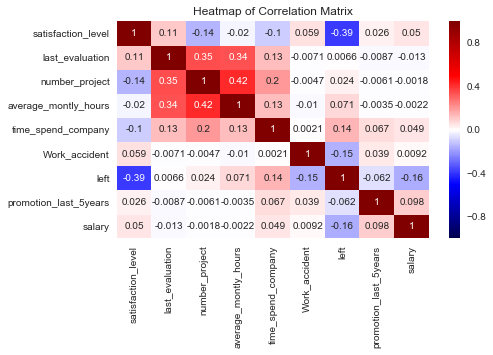

In [9]:
#Part2-visualize the data
fig = plt.figure(figsize=(7,4))
corr = X.corr()
sns.heatmap(corr,annot=True,cmap='seismic',
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
sns.plt.title('Heatmap of Correlation Matrix')

#Result:There seems to be a clear inverse relation between satisfaction levels and people leaving


In [ ]:
#We will now visualize the distribution of several features of interest using a histogram or a kernel density estimate plot.

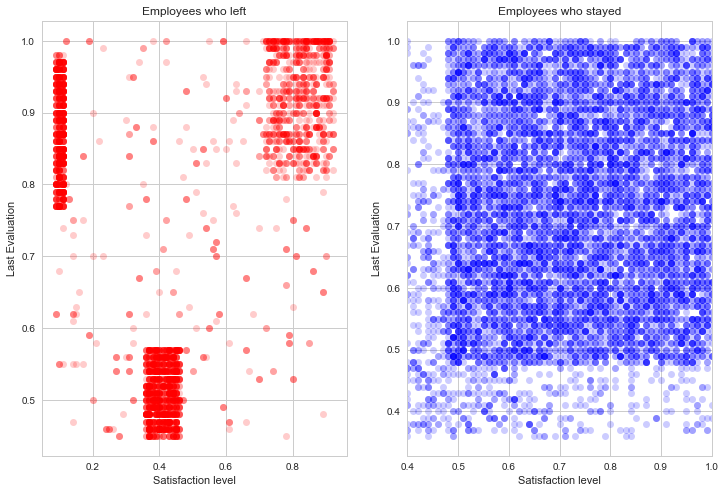

In [10]:
plt.figure(figsize = (12,8))
plt.subplot(1,2,1)
plt.plot(X.satisfaction_level[X.left == 1],X.last_evaluation[X.left == 1],'ro', alpha = 0.2)
plt.ylabel('Last Evaluation')
plt.title('Employees who left')
plt.xlabel('Satisfaction level')

plt.subplot(1,2,2)
plt.title('Employees who stayed')
plt.plot(X.satisfaction_level[X.left == 0],X.last_evaluation[X.left == 0],'bo', alpha = 0.2,)
plt.xlim([0.4,1])
plt.ylabel('Last Evaluation')
plt.xlabel('Satisfaction level')



#There are 3 clusters for those employees who left.
#The happy and appreciated - we'll call them "Winners" - those who leave because they were offered a better opportunity.

#The appreciated but unhappy - Maybe they are over-qualified for the job. Let's call them the "Frustrated"

#The unappreciated and unhappy - It is not surprising that these would leave, possibly even fired. They are simply a "Bad Match"

[[ 0.80851586  0.91170931]
 [ 0.11115466  0.86930085]
 [ 0.41014545  0.51698182]]


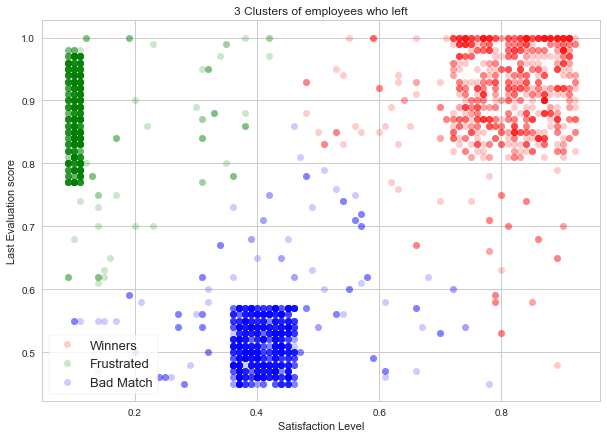

In [12]:

#There are 3 clusters for those employees who left.
#The happy and appreciated - we'll call them "Winners" - those who leave because they were offered a better opportunity.

#The appreciated but unhappy - Maybe they are over-qualified for the job. Let's call them the "Frustrated"

#The unappreciated and unhappy - It is not surprising that these would leave, possibly even fired. They are simply a "Bad Match"

#Let's plot the clusters using the 3 classifications above:



from sklearn.cluster import KMeans
kmeans_df =  X[X.left == 1].drop([ u'number_project',
       u'average_montly_hours', u'time_spend_company', u'Work_accident',
       u'left', u'promotion_last_5years', u'department', u'salary'],axis = 1)
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(kmeans_df)
print(kmeans.cluster_centers_)

left = X[X.left == 1]
left['label'] = kmeans.labels_
plt.figure(figsize=(10,7))
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation score')
plt.title('3 Clusters of employees who left')
plt.plot(left.satisfaction_level[left.label==0],left.last_evaluation[left.label==0],'o', alpha = 0.2, color = 'r')
plt.plot(left.satisfaction_level[left.label==1],left.last_evaluation[left.label==1],'o', alpha = 0.2, color = 'g')
plt.plot(left.satisfaction_level[left.label==2],left.last_evaluation[left.label==2],'o', alpha = 0.2, color = 'b')
plt.legend(['Winners','Frustrated','Bad Match'], loc = 'best', fontsize = 13, frameon=True)












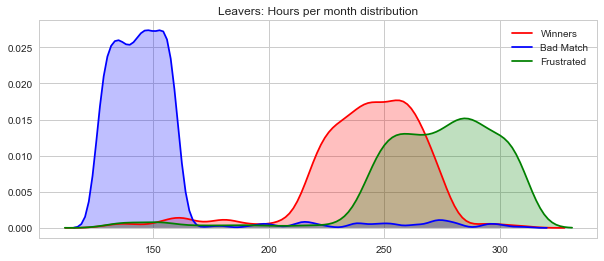

In [13]:
#Let's look the the average monthly hours distribution for those that left:

winners = left[left.label ==0]
frustrated = left[left.label == 1]
bad_match = left[left.label == 2]

plt.figure(figsize=(10,4))
sns.kdeplot(winners.average_montly_hours, color = 'r', shade=True)
sns.kdeplot(bad_match.average_montly_hours, color ='b', shade=True)
sns.kdeplot(frustrated.average_montly_hours, color ='g', shade=True)
plt.legend(['Winners','Bad Match','Frustrated'])
plt.title('Leavers: Hours per month distribution')


#Result:

#There's definitely some useful information here.
#It seems that the frustrated group works by far the longest hours (possibly, and understandably, their reason to be frustrated). 
#The winners also work long hours, and those who are a bad match work significantly less hours.


In [ ]:
#We will now visualize the distribution of several features of interest using a histogram or a kernel density estimate plot.

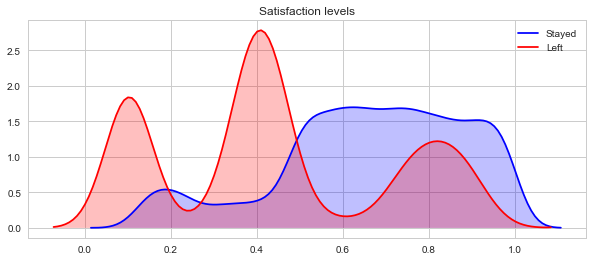

In [14]:
#produce kernel density estimate plots and histograms to look at each feature
fig = plt.figure(figsize=(10,4))
ax=sns.kdeplot(X.loc[(X['left'] == 0),'satisfaction_level'] , color='b',shade=True, label='Stayed')
ax=sns.kdeplot(X.loc[(X['left'] == 1),'satisfaction_level'] , color='r',shade=True, label='Left')
plt.title('Satisfaction levels')

In [ ]:
#People who have left were in general less satisfied with their jobs. 
#However there are also people who are quite satisfied with their jobs but still left. 
#This means that there are other factors contributing to an employee leaving their job other than them being satisfied with their job or not. 
#'satisfaction_level` seems to be a good feature in differentiating people who left the company from people who did not leave.

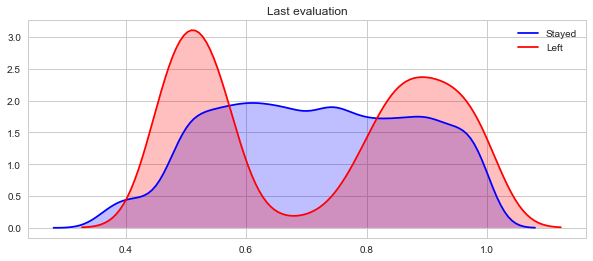

In [15]:
#produce kernel density estimate plots and histograms to look at each feature
fig = plt.figure(figsize=(10,4),)
ax=sns.kdeplot(X.loc[(X['left'] == 0),'last_evaluation'] , color='b',shade=True,label='Stayed')
ax=sns.kdeplot(X.loc[(X['left'] == 1),'last_evaluation'] , color='r',shade=True, label='Left')
plt.title('Last evaluation')

In [ ]:
#Looks like people who leave the company either did pretty bad or pretty good in their last performance evaluation. 
#There are not many medium level performers among the people who left. 
#If an employee is evaluated in the range of 0.6 to 0.8 (ball park), they are likely still working in the company.

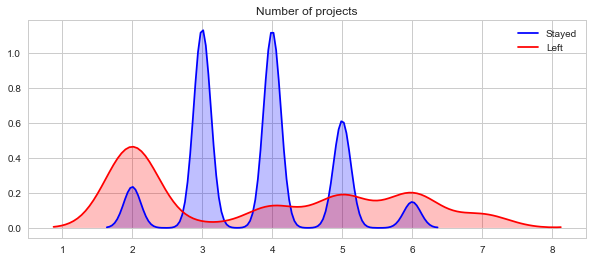

In [16]:
#produce kernel density estimate plots and histograms to look at each feature
fig = plt.figure(figsize=(10,4))
ax=sns.kdeplot(X.loc[(X['left'] == 0),'number_project'] , color='b',shade=True, label= 'Stayed')
ax=sns.kdeplot(X.loc[(X['left'] == 1),'number_project'] , color='r',shade=True, label= 'Left')
plt.title('Number of projects')

In [ ]:
#People who left mostly work on a small number of projects (2), or on a large number of projects (5-7). 
#I added a new feature: number of projects worked on per year. 
#I defined this as the number of projects the employee works on during his/her employment period, divided by the total number of years the employee worked in the company. 
#People who left mostly work on a lower number of projects per year when compare to the employees who have not left.

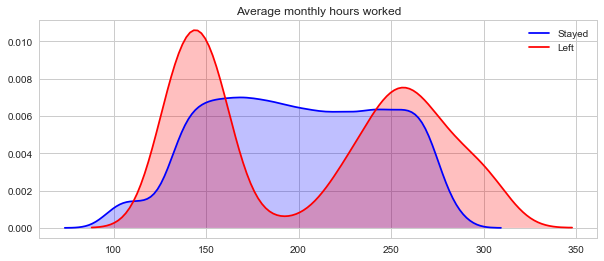

In [17]:
#produce kernel density estimate plots and histograms to look at each feature
fig = plt.figure(figsize=(10,4))
ax=sns.kdeplot(X.loc[(X['left'] == 0),'average_montly_hours'] , color='b',shade=True, label='Stayed')
ax=sns.kdeplot(X.loc[(X['left'] == 1),'average_montly_hours'] , color='r',shade=True, label='Left')
plt.title('Average monthly hours worked')

In [ ]:
#People who left either work a small amount of hours on average per month (lower than 150 hours), or they work a large number of hours (more than 250). 
#This means that the employees who leave tend to either not work much or work a lot. 
#The fact that employees who leave are evaluated either bad or quite good in their last performance evaluation might be related to this fact.

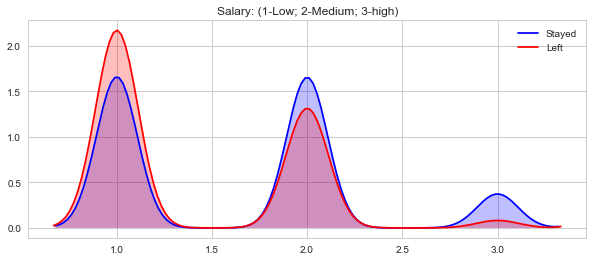

In [18]:
#produce kernel density estimate plots and histograms to look at each feature
fig = plt.figure(figsize=(10,4))
ax=sns.kdeplot(X.loc[(X['left'] == 0),'salary'] , color='b',shade=True, label='Stayed')
ax=sns.kdeplot(X.loc[(X['left'] == 1),'salary'] , color='r',shade=True, label='Left')
plt.title('Salary: (1-Low; 2-Medium; 3-high)')

In [ ]:
#We can clearly spot a trend here - the higher the salary, the lower the chances of employees leaving.

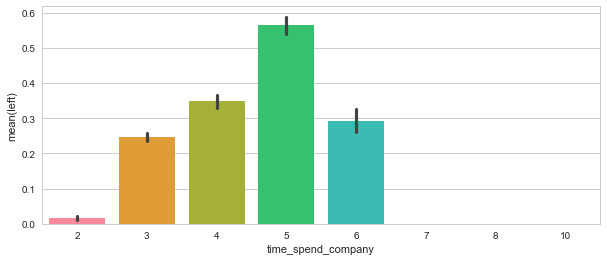

In [19]:
fig = plt.figure(figsize=(10,4),)
sns.barplot(x = 'time_spend_company', y = 'left', data = X, saturation=1)

In [ ]:
#The majority of employees tend to leave around the 5th year.

In [ ]:
#Part 3-Machine learning

In [ ]:
#break our dataset into training and test dataset


In [20]:
features = X[['satisfaction_level','average_montly_hours','promotion_last_5years','salary','number_project']]
X = features
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, random_state=0,test_size=0.25)
print('Training set volume:', X_train.shape[0])
print('Test set volume:', X_test.shape[0])

('Training set volume:', 11249)
('Test set volume:', 3750)


In [21]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
accuracy_score(y_test,logreg.predict(X_test))

0.78933333333333333

In [23]:
# Create Naive Bayes classifier
clf_gb = GaussianNB()
clf_gb.fit(X_train, y_train)
predicts_gb = clf_gb.predict(X_test)
print("GB Accuracy Rate, which is calculated by accuracy_score() is: %f" % accuracy_score(y_test, predicts_gb))

GB Accuracy Rate, which is calculated by accuracy_score() is: 0.828533


In [24]:
#Create k-nn
knn=KNeighborsClassifier(n_neighbors=14)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print("KNN5 Accuracy Rate, which is calculated by accuracy_score() is: %f" %accuracy_score(y_test,y_pred))

KNN5 Accuracy Rate, which is calculated by accuracy_score() is: 0.910667


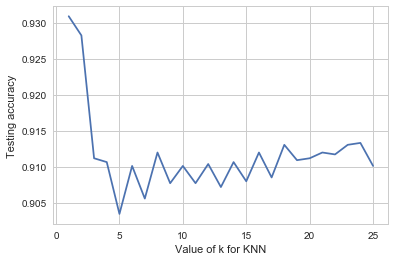

In [25]:
#Let's try to optimize the KNN model:


k_range = range(1,26)
scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    scores.append(accuracy_score(y_test,y_pred))

plt.plot(k_range,scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Testing accuracy')


In [26]:
#Decision Tree
clf_dt = tree.DecisionTreeClassifier(min_samples_split=25)
clf_dt.fit(X_train, y_train)
predicts_dt = clf_dt.predict(X_test)
print("Decision tree Accuracy Rate, which is calculated by accuracy_score() is: %f" % accuracy_score(y_test, predicts_dt))

Decision tree Accuracy Rate, which is calculated by accuracy_score() is: 0.936000


In [27]:
#SVM -> takes a few seconds to run!
clf_svm = svm.SVC(kernel='rbf',probability=False)
clf_svm.fit(X_train,y_train)
predicts_svm = clf_svm.predict(X_test)
print("SVM Accuracy Rate, which is calculated by accuracy_score() is: %f" % accuracy_score(y_test, predicts_svm))

SVM Accuracy Rate, which is calculated by accuracy_score() is: 0.916000


In [28]:
#Random forest classifier
clf_rf = RandomForestClassifier(n_estimators = 10,min_samples_split=2,max_depth=30)
clf_rf.fit(X_train, y_train)

accuracy_rf = clf_rf.score(X_test,y_test)
print("Random Forest Accuracy Rate, which is calculated by accuracy_score() is: %f" % accuracy_rf)

Random Forest Accuracy Rate, which is calculated by accuracy_score() is: 0.954400


In [29]:
#neural networks
from sklearn.neural_network import MLPRegressor
clf = MLPRegressor(max_iter=100,learning_rate='adaptive',hidden_layer_sizes = 200)
clf.fit(X_train,y_train)
print("MLPR Accuracy Rate, which is calculated by accuracy_score() is: %f" % accuracy_score(y_test, predicts_svm))

MLPR Accuracy Rate, which is calculated by accuracy_score() is: 0.916000


In [30]:
#final test
#Using real data from the testing set, let's put our Random forest classifier to a real test.


y_test_real = X_test.iloc[0:5,:]

predict_real = clf_rf.predict(y_test_real)
for i in predict_real:
    print (i)


1
0
0
0
0


In [ ]:
#result:The predicted value for is 'Stayed'

In [31]:
#Now, let's look at the real value:

y_test.iloc[0:5]

1670     1
13378    0
10233    0
4719     0
7003     0
Name: left, dtype: int64

In [ ]:
#Conclusion
#We now have a working model for predicting who is likely to leave the company, based on 5 input parameters.